# Decision Trees & Ensemble

## 1. Decision Tree Classifier model
### Decision Tree Model
- 기계학습에서 지도학습으로 분류되는 알고리즘으로 분류, 회귀분석 등의 목적으로 사용
- 부모 노드로부터 자식 노드에 속하는 자료 순수도가 가장 크게 증가하도록 트리를 형성하면서 진행
- 입력변수를 이용하여 목표변수의 분포구별정도를 파악하여 자식노드 형성
- 지니지수, 엔트로피 지수, 정보이득 등의 분리 기준으로 정확도 및 인식률 파악
- Scikit-learn 모듈을 사용함

## Package install error
- cmd에서 package 설치오류가 발생하면 anaconda prompt 설치 시도
- pip install -U scikit-learn 과 같은 명령어를 쳐서 scikit-learn  버전 업데이트하고 jupyter notebook 다시 실행

## 1-1. PlayTennis Data

In [1]:
# data를 다루는데 필요한 기본 package import
import pandas as pd
import numpy as np

In [2]:
# playtennis.csv파일 불러오기
# 반드시 jupyternotebook을 실행한 폴더 안에 같이 있어야함
tennis_data = pd.read_csv('playtennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
# Dicision Tree 모델을 이용하기 위해 sting값을 int값으로 전처리 변환
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 8)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 11)

tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [4]:
# Decision Tree 모델을 학습하기 위해 독립변수들만 추출
# 해당 모델에 적용하기 위해 배열로 변환
X1 = np.array(tennis_data[['Outlook', 'Temperature', 'Humidity', 'Wind']])
X1

array([[0, 3, 6, 8],
       [0, 3, 6, 9],
       [1, 3, 6, 8],
       [2, 4, 6, 8],
       [2, 5, 7, 8],
       [2, 5, 7, 9],
       [1, 5, 7, 9],
       [0, 4, 6, 8],
       [0, 5, 7, 8],
       [2, 4, 7, 8],
       [0, 4, 7, 9],
       [1, 4, 6, 9],
       [1, 3, 7, 8],
       [2, 4, 6, 9]], dtype=int64)

In [5]:
# Decision Tree 모델을 학습하기 위해 종속변수만 추출
# 해당 모델에 적용하기 위해 배열로 변환
y1 = np.array(tennis_data['PlayTennis'])
y1 

array([10, 10, 11, 11, 11, 10, 11, 10, 11, 11, 11, 11, 11, 10], dtype=int64)

In [15]:
# data set을 training set과 test set으로 분리할 서브패키지 불러들임
from sklearn.model_selection import train_test_split

# train(훈련)과 test(테스트)를 구분해 임의의 개수로
# 각각 변수 X_train, X_test, y_train, y_test에 저장
# 일반적으로 train/test의 비율 = train(7.5) : test(2.5)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1)
print('X1_train\n', X1_train, '\n')
print('X1_test\n', X1_test, '\n')
print('y1_train\n', y1_train, '\n')
print('t1_test\n', y1_test, '\n')

X1_train
 [[2 5 7 9]
 [0 3 6 9]
 [2 4 7 8]
 [1 5 7 9]
 [0 4 6 8]
 [1 3 6 8]
 [2 5 7 8]
 [0 3 6 8]
 [2 4 6 8]
 [0 4 7 9]] 

X1_test
 [[0 5 7 8]
 [2 4 6 9]
 [1 3 7 8]
 [1 4 6 9]] 

y1_train
 [10 10 11 11 10 11 11 10 11 11] 

t1_test
 [11 10 11 11] 



In [16]:
# 의사결정 트리 알고리즘 서브 패키지를 불러들임
from sklearn.tree import DecisionTreeClassifier

# Decision Tree 모듈을 dt_clf에 저장
# .fit 함수를 통해 데이터 학습
# 생성된 모델 다시 변수 dt_clf에 저장
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X1_train, y1_train)
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
# test데이터로 분류된 종속변수를 대입하여 에측
dt_predict = dt_clf.predict(X1_test)
dt_predict

array([11, 10, 11, 11], dtype=int64)

In [18]:
# 실제값과 예측값의 차이를 배열로 표시
# 모델의 성능을 평가하기 위한 패키지 불러들임
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y1_test, dt_predict))

[[1 0]
 [0 3]]


In [19]:
# 분류 측정 항목을 보여주는 모듈
# 모델의 성능을 평가하기 위한 패키지 불러들임
from sklearn.metrics import classification_report, accuracy_score

print("accuracy is = ", accuracy_score(y1_test, dt_predict))
print(classification_report(y1_test, dt_predict))

accuracy is =  1.0
             precision    recall  f1-score   support

         10       1.00      1.00      1.00         1
         11       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         4



## Visualization Decision Tree
- 추가적으로 설치파일 필요
- 복잡하기 때문에 각자 집에서 스스로 실행
- 실습시간에는 생략

In [20]:
'''
코드를 실행하기 전 Jupyter Notebook 내에서 그래프 표현을 위해
graphviz(Graph Visualization Software)를 다운로드 및 설치
다운로드 : http://www.graphviz.org/Download_windows.php
(작업 환경을 Windows로 가정했을 시)
Graphviz-2.38.msi 파일을 다운로드
다운로드 한 graphviz-2.38.msi 파일을 설치 진행
설치 진행 시 옵션변경 없이 next 버튼 선택
Graphviz-2.36을 설치할 경로 선택 부분에서 기본적으로 나오는 경로 선택
설치될 기본 경로 : C\Program Files (x86) 아래에 위치

Graphviz2.38이 설치되고 bin 폴더가 있는 경로인
'C:\Program Files(x86)/Graphviz2.38/bin/' 를
os 모듈 중 경로 구분 기호를 반환하는 함수인 os.pathsep을 이용해
환경변수들을 나타내는 사전 함수인 os.environ['PATH']에 동적으로 할당해 저장

'''
# 운영체제(Operating System)와 상호작용하기 위한 기본적인 기능(경로 생성, 변경 등)이 제공되는 모듈
import os

os.environ["PATH"]+= os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin' # 경로 설정

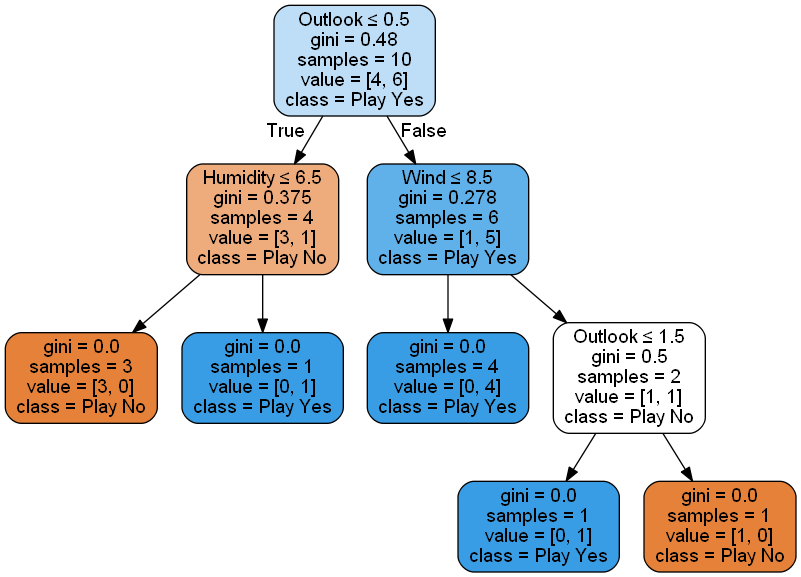

In [21]:
# 시각화/ 설치파일 필요
# IPython 내에 정보를 보여주는 도구용 공용 API
# Image : raw 데이터가 있는 PNG, JPEG 이미지 객체를 만드는 모듈
from IPython.display import Image

# 그래프를 생성하는 graphviz의 Dot 언어를 파이썬 인터페이스에 제공하는 모듈
# 혹시 아래 pydotplus 모듈이 없다는 오류가 나오는 경우 아나콘다 프롬프트에서 pip install pydotplus 실행후 다시 실행
import pydotplus
from sklearn import tree

os.environ["PATH"]+= os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin' #경로 설정

feature_names = tennis_data.columns[0:4].tolist()
feature_names

target_name = np.array(['Play No', 'Play Yes'])

#의사결정트리를 dot형식으로 내보내는 함수 이용
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

Image(dt_graph.create_png())

# 위에 있는 숫자는 의미 없는 숫자
# gini부터가 결과값

## 1-2. Boston Datasets
- Scikit-learn datasets 중 하나인 Boston Data 이용

In [22]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)
# Boston Datasets의 내용물 확인
# Attribuite 14 is usuall the target(price)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [23]:
# 독립변수 확인
df_boston_data = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
# 종속변수 확인(price)
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [25]:
# Decision Tree를 범주형으로 나누기 위해 임의로 범주 설정
# boston_target(price)의 가격 분포를 확인
df_boston_target = pd.DataFrame(boston.target, columns = ['Price'])
df_boston_target.describe()

,Price
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [28]:
# Decision Tree에 학습하기 위해 데이터셋 형성
X2 = np.array(boston.data)
y2 = boston.target

# 평균값 미만인 price들은 전부 0, 이상이면 1로 변환
y2 = np.where(y2 <=22.532806, 0, 1) # 평균값(가격) by (pd.DataFrame(y)).describe()
y2

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1,

In [29]:
# train과 test을 random하게 나눈다.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
print('X2_train\n', X2_train, '\n')
print('X2_test\n', X2_test, '\n')
print('y2_train\n', y2_train, '\n')
print('y2_test\n', y2_test, '\n')

X2_train
 [[  1.62110000e-01   2.00000000e+01   6.96000000e+00 ...,   1.86000000e+01
    3.96900000e+02   6.59000000e+00]
 [  1.35472000e+00   0.00000000e+00   8.14000000e+00 ...,   2.10000000e+01
    3.76730000e+02   1.30400000e+01]
 [  8.66400000e-02   4.50000000e+01   3.44000000e+00 ...,   1.52000000e+01
    3.90490000e+02   2.87000000e+00]
 ..., 
 [  4.52700000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   9.08000000e+00]
 [  6.89900000e-02   0.00000000e+00   2.56500000e+01 ...,   1.91000000e+01
    3.89150000e+02   1.43700000e+01]
 [  3.32105000e+00   0.00000000e+00   1.95800000e+01 ...,   1.47000000e+01
    3.96900000e+02   2.68200000e+01]] 

X2_test
 [[  3.44500000e-02   8.25000000e+01   2.03000000e+00 ...,   1.47000000e+01
    3.93770000e+02   7.43000000e+00]
 [  7.97800000e-02   4.00000000e+01   6.41000000e+00 ...,   1.76000000e+01
    3.96900000e+02   7.19000000e+00]
 [  6.12700000e-02   4.00000000e+01   6.41000000e+00 ...,   1.76000000e+01


In [31]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X2_train, y2_train)
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
dt_clf_prediction = dt_clf.predict(X2_test)
dt_clf_prediction

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [33]:
print(confusion_matrix(y2_test, dt_clf_prediction))
print('=====================================================')
print("accuracy is = ", accuracy_score(y2_test, dt_clf_prediction))
print('=====================================================')
print(classification_report(y2_test, dt_clf_prediction))

[[62  9]
 [ 8 48]]
accuracy is =  0.866141732283
             precision    recall  f1-score   support

          0       0.89      0.87      0.88        71
          1       0.84      0.86      0.85        56

avg / total       0.87      0.87      0.87       127



In [34]:
for feature_name, imp in zip(boston.feature_names, dt_clf.feature_importances_):
    print(feature_name,'\t', imp)

CRIM 	 0.0448954835949
ZN 	 0.00147371112248
INDUS 	 0.0095906356643
CHAS 	 0.0
NOX 	 0.0118575131849
RM 	 0.140799877533
AGE 	 0.0560198479128
DIS 	 0.068349982741
RAD 	 0.00255296424072
TAX 	 0.0185446634779
PTRATIO 	 0.0355889771173
B 	 0.0202468975135
LSTAT 	 0.590079445897


In [49]:
# 시각화/ 설치파일 필요
os.environ["PATH"]+= os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin' #경로 설정

feature_names = df_boston_data.columns.tolist()
feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

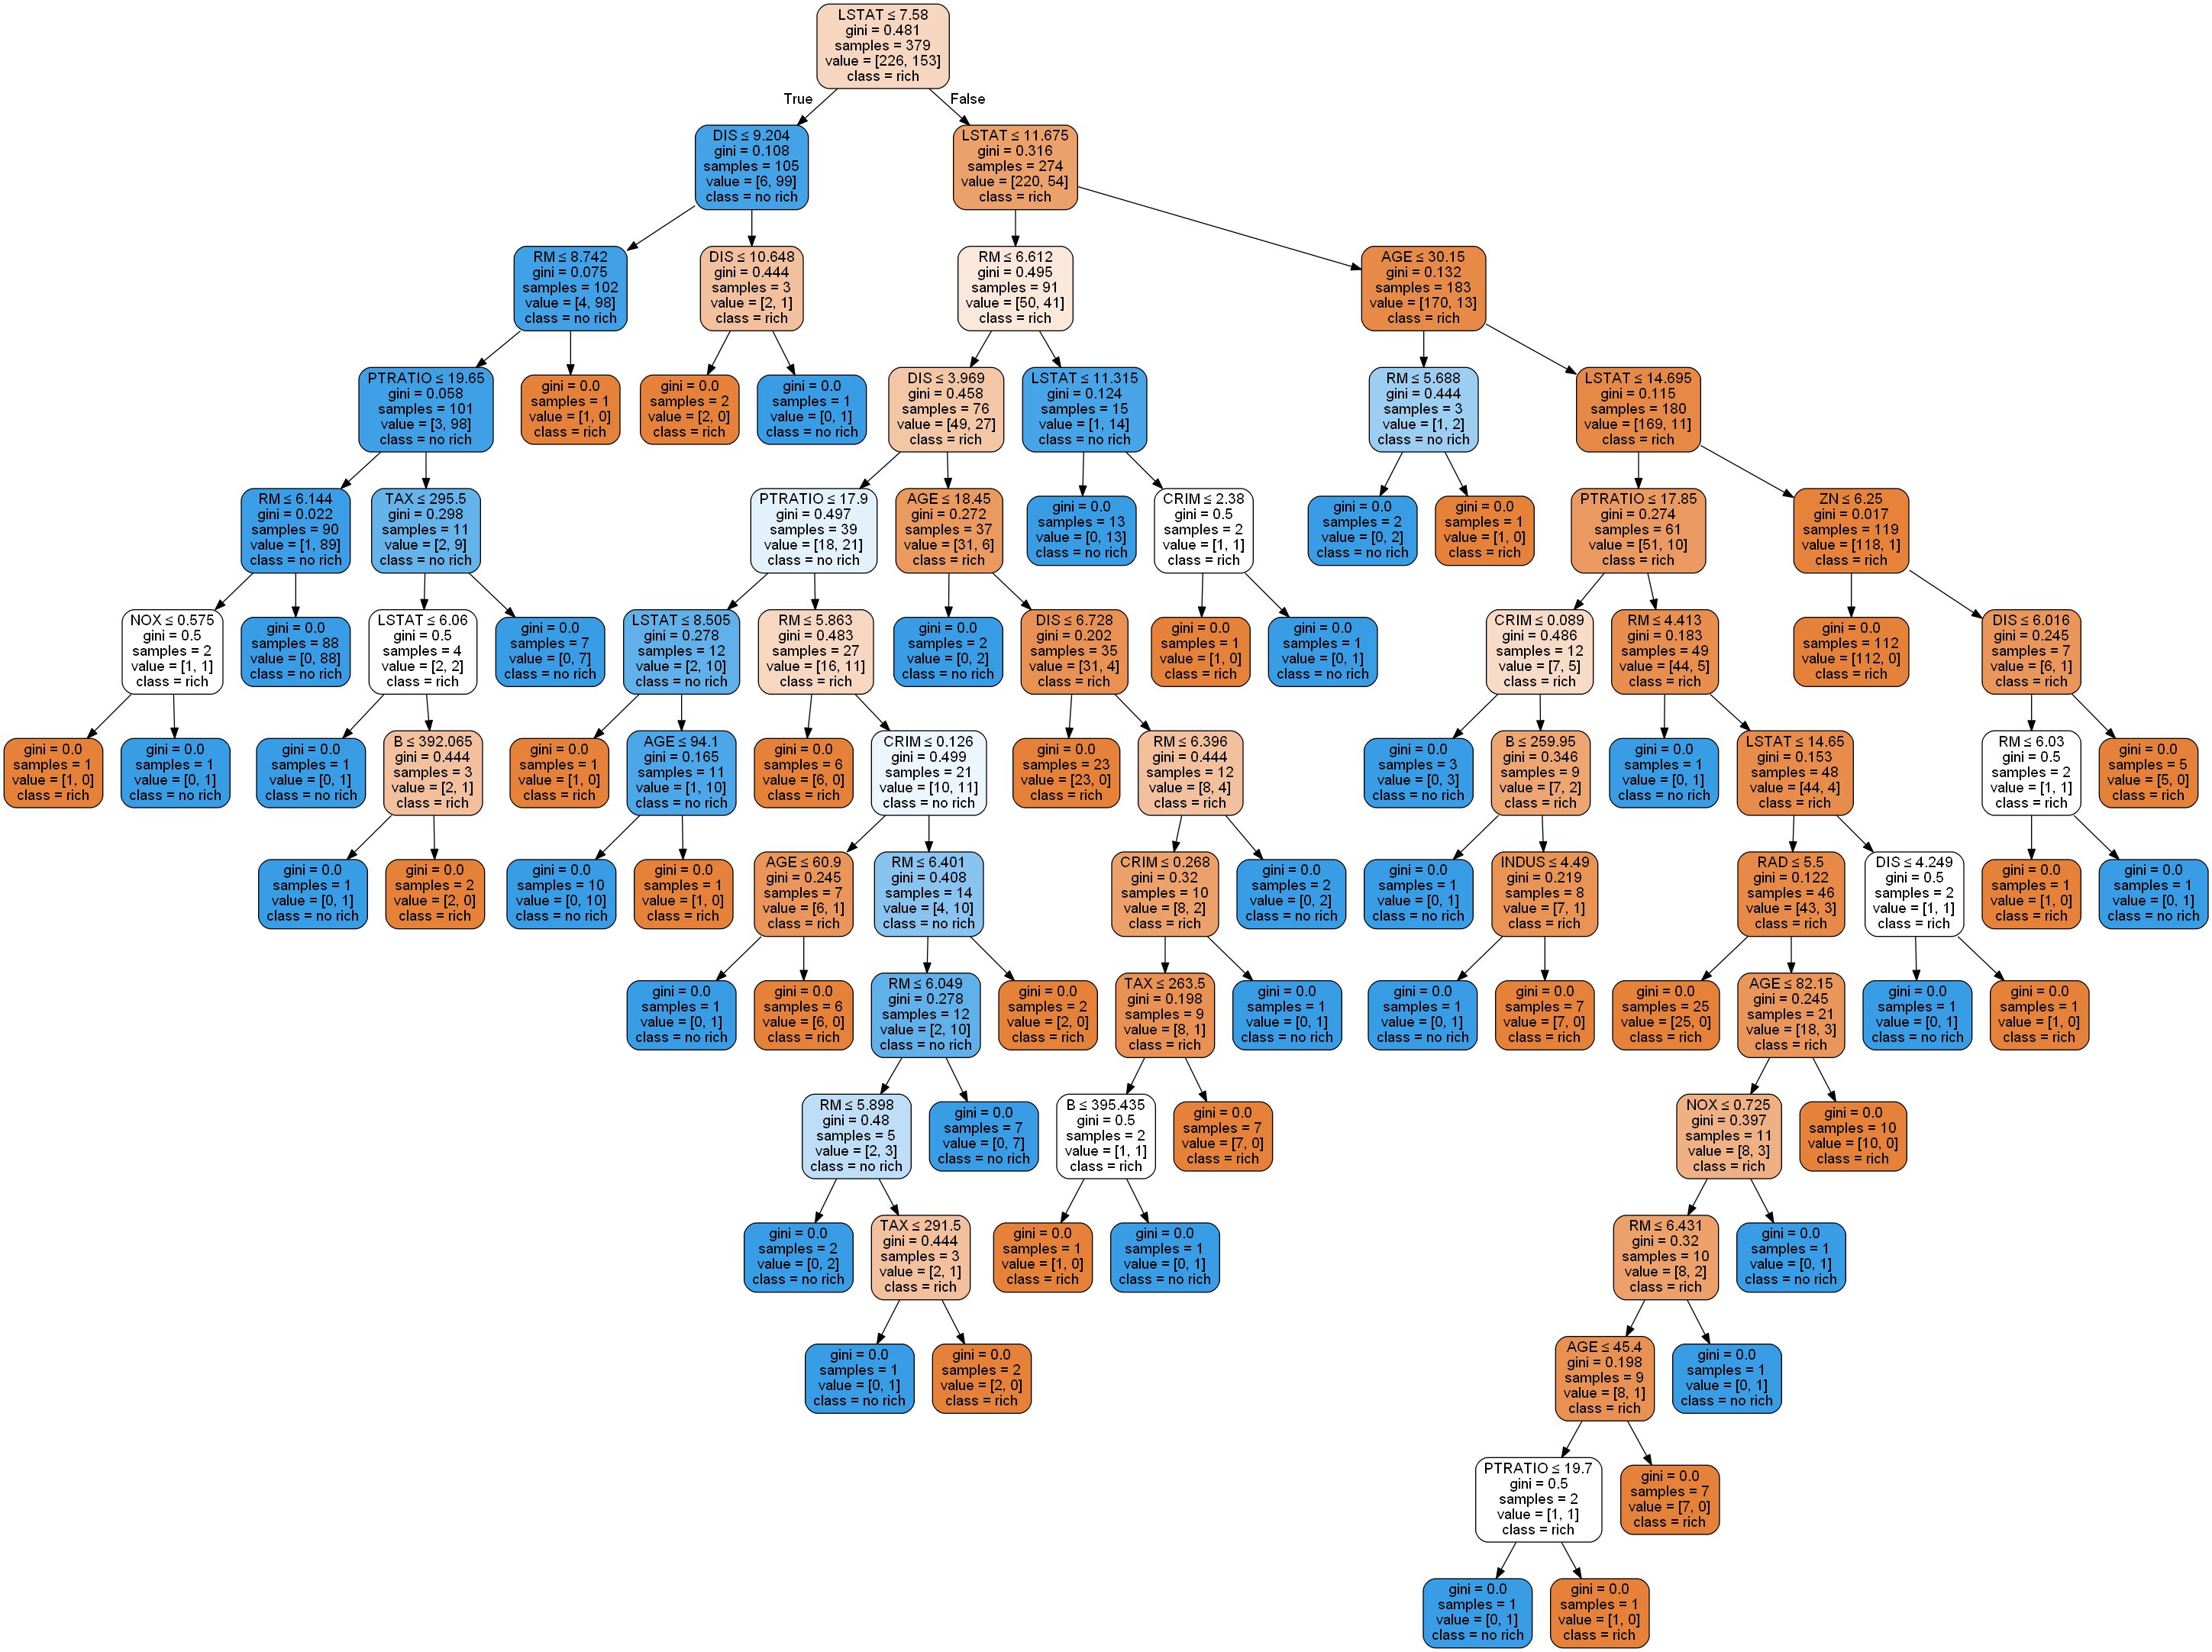

In [50]:
target_name = np.array(['rich', 'no rich'])

#의사결정트리를 dot형식으로 내보내는 함수 이용
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
result_image = dt_graph.create_png()
Image(result_image)
# 위에 있는 숫자는 의미 없는 숫자
# gini부터가 결과값

## 2. Random Forest Classifier model with Iris Data
### Random Forest Model
- Decision Tree model의 단점을 개선하기 위해 만든 알고리즘
(제한성이 많고 과최적화가 빈번히 발생)
- Decision Tree model의 확장ver
- 여러개의 Decision Tree를 이용하여 하나의 Forest를 이룬다는 의미

In [35]:
# Scikit-learn 패키지에 있는 datasets 모듈
# 머신러닝을 할 떄 주로 사용하는 Datasets
from sklearn.datasets import load_iris

# Load Iris Data
iris = load_iris()
print('iris data = \n' ,iris.data)
print('\n')
print('iris target = \n' , iris.target)

iris data = 
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.

In [36]:
# 데이터 총 갯수 150개
# train data 설정
# iris.data는 iris의 feature값들을 의미
# iris.target은 iris의 종류를 의미
X3_train = iris.data[:-30]
y3_train = iris.target[:-30]

# test data 설정
X3_test = iris.data[-30:]
y3_test = iris.target[-30:]

X3_test, y3_test

(array([[ 6.9,  3.2,  5.7,  2.3],
        [ 5.6,  2.8,  4.9,  2. ],
        [ 7.7,  2.8,  6.7,  2. ],
        [ 6.3,  2.7,  4.9,  1.8],
        [ 6.7,  3.3,  5.7,  2.1],
        [ 7.2,  3.2,  6. ,  1.8],
        [ 6.2,  2.8,  4.8,  1.8],
        [ 6.1,  3. ,  4.9,  1.8],
        [ 6.4,  2.8,  5.6,  2.1],
        [ 7.2,  3. ,  5.8,  1.6],
        [ 7.4,  2.8,  6.1,  1.9],
        [ 7.9,  3.8,  6.4,  2. ],
        [ 6.4,  2.8,  5.6,  2.2],
        [ 6.3,  2.8,  5.1,  1.5],
        [ 6.1,  2.6,  5.6,  1.4],
        [ 7.7,  3. ,  6.1,  2.3],
        [ 6.3,  3.4,  5.6,  2.4],
        [ 6.4,  3.1,  5.5,  1.8],
        [ 6. ,  3. ,  4.8,  1.8],
        [ 6.9,  3.1,  5.4,  2.1],
        [ 6.7,  3.1,  5.6,  2.4],
        [ 6.9,  3.1,  5.1,  2.3],
        [ 5.8,  2.7,  5.1,  1.9],
        [ 6.8,  3.2,  5.9,  2.3],
        [ 6.7,  3.3,  5.7,  2.5],
        [ 6.7,  3. ,  5.2,  2.3],
        [ 6.3,  2.5,  5. ,  1.9],
        [ 6.5,  3. ,  5.2,  2. ],
        [ 6.2,  3.4,  5.4,  2.3],
        [ 5.9,

In [37]:
# Scikit-learn의 하위모듈인 ensemble에 있는 Random Forest Classifier import
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
rfc = RandomForestClassifier(n_estimators = 10) #n_estimators는 tree의 갯수 설정
rfc

# Random Forest Classifier의 자세한 옵션은 아래 URL를 참고
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
# 모델 학습(train data)
rfc.fit(X3_train, y3_train)

# 모델 예측(test data)
prediction = rfc.predict(X3_test)
print(prediction == y3_test)

[ True False  True False  True  True False False  True False  True  True
  True False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


In [40]:
# 성능 분석을 위한 패키지 import
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [41]:
print("accuracy is = ", accuracy_score(prediction, y3_test))
print("==================================================")
print(classification_report(prediction, y3_test))

# 작은 크기의 data임에도 불구하고
# precision이 낮은 걸로 보아 분류가 잘 되지 않았다.

accuracy is =  0.733333333333
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         8
          2       0.73      1.00      0.85        22

avg / total       0.54      0.73      0.62        30



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
# train&test data를 잘 정하지 않으면 위와 같이 낮은 정확도가 도출
# 따라서 train_test_split 함수를 이용하여 데이터를 random하게 분류
from sklearn.model_selection import train_test_split

X4 = iris.data
y4 = iris.target
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, test_size = 0.2) # train : test = 8 : 2 비율로 설정
print('y3_test : ', y3_test) # 기존 terget data
print('y4_test : ', y4_test) # random target data

y3_test :  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
y4_test :  [2 2 0 2 2 0 1 0 2 0 1 2 2 0 2 0 0 2 2 1 2 2 1 2 2 1 1 2 0 0]


In [46]:
# Random하게 분류한 data를 이용하여 Random Forest 다시 적용
rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(X4_train, y4_train)
prediction = rfc.predict(X4_test)
print("accuracy is ", accuracy_score(y4_test, prediction))
print("==============================================")
print(classification_report(y4_test,prediction))

accuracy is  0.966666666667
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.86      1.00      0.92         6
          2       1.00      0.93      0.97        15

avg / total       0.97      0.97      0.97        30



In [47]:
# Decisicn Tree의 갯수를 200개로 설정 후 다시 시도
rfc_2 = RandomForestClassifier(n_estimators = 200,
                              max_features = 4)
rfc_2.fit(X4_train, y4_train)
prediction_2 = rfc_2.predict(X4_test)
print("accuray is ", accuracy_score(prediction_2, y4_test))
print("==============================================")
print(classification_report(prediction_2, y4_test))

# Data가 비교적 간단하고 작아서 별 차이가 없다.
# obb값을 true로 설정, 각 feature들의 중요도를 볼 수 있다.

accuray is  0.966666666667
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      0.86      0.92         7
          2       0.93      1.00      0.97        14

avg / total       0.97      0.97      0.97        30



In [48]:
# 각 feature들의 중요도 확인
for feature_name, importance in zip(iris.feature_names, rfc_2.feature_importances_):
    print(feature_name, importance)

sepal length (cm) 0.0133594106491
sepal width (cm) 0.0175313778813
petal length (cm) 0.479972105815
petal width (cm) 0.489137105655
